In [1]:
#Import Datasets
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [2]:
# Read data, view its first 5 rows and shape(Row,Columns)
drug_df = pd.read_csv("drug200.csv", delimiter=",")
print(drug_df[0:5])
print(drug_df.shape)

   Age Sex      BP Cholesterol  Na_to_K   Drug
0   23   F    HIGH        HIGH   25.355  drugY
1   47   M     LOW        HIGH   13.093  drugC
2   47   M     LOW        HIGH   10.114  drugC
3   28   F  NORMAL        HIGH    7.798  drugX
4   61   F     LOW        HIGH   18.043  drugY
(200, 6)


In [4]:
X = drug_df[['Age','Sex','BP','Cholesterol']].values
y = drug_df[['Drug']]

In [5]:
#Encode sex categories
le_sex = preprocessing.LabelEncoder()
le_sex.fit(['F','M'])
X[:,1] = le_sex.transform(X[:,1])


In [6]:
#Encode blood pressure categories
le_BP = preprocessing.LabelEncoder()
le_BP.fit([ 'LOW', 'NORMAL', 'HIGH'])
X[:,2] = le_BP.transform(X[:,2])

In [7]:
#Encode chlosterol levels categories
le_Chol = preprocessing.LabelEncoder()
le_Chol.fit([ 'NORMAL', 'HIGH'])
X[:,3] = le_Chol.transform(X[:,3])

In [8]:
#Split data into train and test sets
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)

In [9]:
#Create an instance of the DecisionTreeClassifier called drugTree
drugTree = DecisionTreeClassifier(criterion="entropy",max_depth=4)

In [10]:
#fit the model and predict the test set
drugTree.fit(X_trainset,y_trainset)
predTree = drugTree.predict(X_testset)
print(predTree[0:5])

['drugY' 'drugX' 'drugY' 'drugY' 'drugY']


In [21]:
#Now lets evaluate the model using the accuray score and confusion Matrix
#import sklearn metrics library
#import matplotlib library as well
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns


DecisionTrees's Accuracy:  0.5


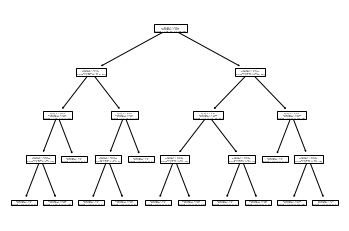

In [16]:
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, predTree))
tree.plot_tree(drugTree)
plt.show()


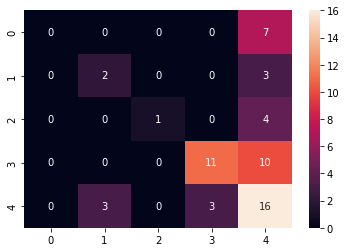

In [23]:
cm = confusion_matrix(y_testset,predTree)

sns.heatmap(cm,annot=True)
plt.show()



